## DATA PREPROCESSING

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## APLICAR UNA SIMPLE REGRESIÓN LINEAL (COMPARACIÓN)

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## APLICAR EL MODELO DE REGRESIÓN POLYNOMIAL (COMPARACIÓN)

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) ## aquí ponemos el grado (potenciador o exponente)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y) ## ¿Por qué regresión lineal? Porque una regresión polinomial es lineal también ya que vemos uniformidad en su fórmula: y = b0 + b1X1 + b2Xsub1exp2... + bnXsubnexpn
                         ## Si la fórmula contendrá una operación de división o multiplicación tipo y = b0 + b1X1 / b2Xsub2exp2 - ya no seria lineal


LinearRegression()

## VISUALIZANDO EL RESULTADO DE UNA SIMPLE REGRESIÓN LINEAL

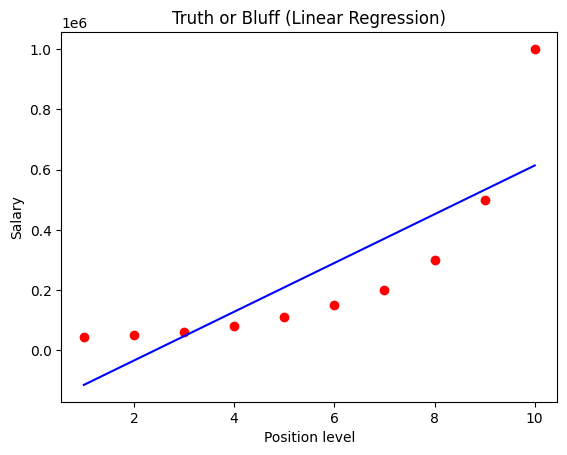

In [5]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Concluimos que al aplicar un modelo de simple regresión lineal a este dataset no sirve.

## VISUALIZANDO EL RESULTADO DE UNA REGRESIÓN POLINOMIAL CON GRADO DE 4

/tmp/ipython-input-3061864919.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


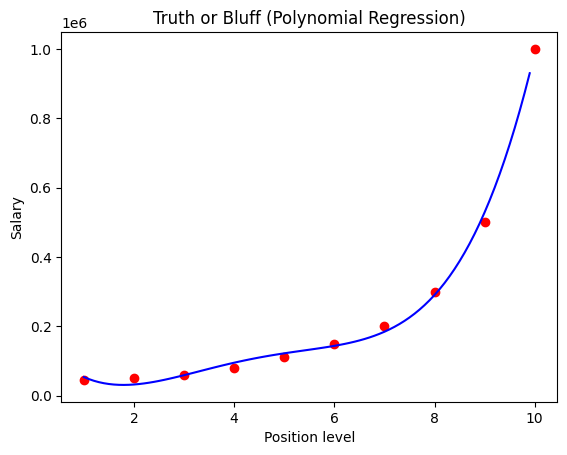

In [11]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## PREDICCIÓN DEL RESULTADO A PARTIR DE UNA SIMPLE REGRESIÓN LINEAL Y POLINOMIAL

Supongamos que trabajamos como un recurso humano y estamos entrevistando un talento que a nosotros nos parece adecuado al vacante. Pero al preguntarle sobre su expectativa salarial, nos dijo que seria 160000 dolares justificando que en su anterior trabajo era su salario anual.

In [12]:
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


Viendo esto, su salario corresponde entre el nivel 6 y 7 (Regional Manager y Partner). Comprobamos si está diciendo la verdad.

In [13]:
## UTILIZANDO UNA SIMPLE REGRESIÓN LINEAL

lin_reg.predict([[6.5]])

array([330378.78787879])

Utilizando este modelo, nos da un 330000 dolares más o menos pero es imposible.

In [15]:
## UTILIZANDO UNA REGRESIÓN POLINOMIAL
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

### Está diciendo la verdad, en su anterior empleo, estaba ganando más o menos 159000 dolares. Escogemos este modelo.